# Week 4 Model

## Architecture
Observations->Feed-Forward Neural Network->Maneuver Detection

## 



# Processing Data

In [1]:
import pandas as pd

filenames = ["ssa_urop_maneuver_10000.txt"]
files = []
data = pd.read_csv(filenames[0],delimiter="[ \t]+",header = None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [2]:
data.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,10000,2019,5,1,0,0,0.0000,6927.307200,0.000000,0.000000,0.000000,4.565322,6.058387
1,10000,2019,5,1,0,9,59.9996,5483.466100,2546.118383,3378.111002,-4.637500,3.614050,4.792622
2,10000,2019,5,1,0,20,0.0001,1755.210377,4031.786150,5345.500543,-7.339350,1.159085,1.527541
3,10000,2019,5,1,0,29,59.9997,-2703.675672,3838.921709,5081.537122,-6.984761,-1.779474,-2.376544
4,10000,2019,5,1,0,40,0.0002,-6034.453654,2045.595052,2693.422602,-3.712610,-3.982214,-5.295295
5,10000,2019,5,1,0,49,59.9998,-6841.881602,-602.578195,-823.273841,1.120041,-4.523608,-5.998989
6,10000,2019,5,1,1,0,0.0003,-4786.255702,-2998.756026,-3994.758918,5.480888,-3.173505,-4.187539
7,10000,2019,5,1,1,9,59.9999,-731.231456,-4143.092666,-5494.158521,7.544315,-0.503814,-0.630296
8,10000,2019,5,1,1,20,0.0004,3628.940063,-3561.703181,-4698.967199,6.463069,2.371401,3.184400
9,10000,2019,5,1,1,30,0.0000,6477.972843,-1497.444181,-1942.233573,2.688656,4.260448,5.671220


# Neural Network

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import ReLU
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.layers import Dense
from keras.utils import np_utils
from keras.initializers import Constant
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np
import argparse
import os

model = Sequential()

#Input Layer
model.add(Dense(24,input_dim=6,kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(Activation('linear'))

#Layer 2
model.add(Dense(576,kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(Activation('tanh'))

#Layer 3
model.add(Dense(288,kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(Activation('tanh'))

#Layer 4
model.add(Dense(24,kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(Activation('tanh'))

#Layer 5
model.add(Dense(12,kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(Activation('tanh'))

#Layer 6
model.add(Dense(6,kernel_initializer="uniform"))

# Training
X_train = data.iloc[:-1,7:]
Y_train = data.iloc[1:,7:]
# ad = Adadelta(learning_rate=1.0, rho=0.95)
# model.compile(loss='huber_loss', optimizer=ad)
# model.fit(X_train.T, Y_train.T, epochs=300000, batch_size=300, validation_split=0.2, verbose = 2)
model.load_weights('./important.h5')


Using TensorFlow backend.


<BarContainer object of 1440 artists>

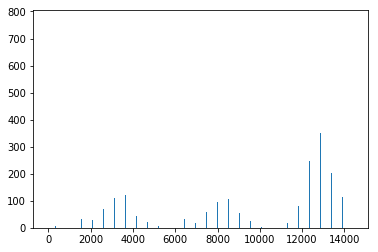

In [4]:
#test 1
sum = []
counts = []
count = 0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train.iloc[x,:]]))
    actual = np.array([Y_train.iloc[x,:]])
    sum.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sum)

In [27]:
satellite1 = pd.read_csv("ssa_urop_maneuver_10001.txt",delimiter="[ \t]+",header = None)
satellite2 = pd.read_csv("ssa_urop_maneuver_10002.txt",delimiter="[ \t]+",header = None)
satellite3 = pd.read_csv("ssa_urop_maneuver_10003.txt",delimiter="[ \t]+",header = None)
satellite4 = pd.read_csv("ssa_urop_maneuver_10004.txt",delimiter="[ \t]+",header = None)
satellite5 = pd.read_csv("ssa_urop_maneuver_10005.txt",delimiter="[ \t]+",header = None)
satellite6 = pd.read_csv("ssa_urop_maneuver_10006.txt",delimiter="[ \t]+",header = None)
X_train1 = satellite1.iloc[:-1,7:]
Y_train1 = satellite1.iloc[1:,7:]

X_train2 = satellite2.iloc[:-1,7:]
Y_train2 = satellite2.iloc[:-1,7:]

X_train3 = satellite3.iloc[:-1,7:]
Y_train3 = satellite3.iloc[1:,7:]

X_train4 = satellite4.iloc[:-1,7:]
Y_train4 = satellite4.iloc[:-1,7:]

X_train5 = satellite5.iloc[:-1,7:]
Y_train5 = satellite5.iloc[1:,7:]

X_train6 = satellite6.iloc[:-1,7:]
Y_train6 = satellite6.iloc[:-1,7:]
X_train2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

,7,8,9,10,11,12
0,6927.307200,0.000000,0.000000,0.000000,4.565322,6.058387
1,5483.466100,2546.118383,3378.111002,-4.637500,3.614050,4.792622
2,1755.210377,4031.786150,5345.500543,-7.339350,1.159085,1.527541
3,-2703.675672,3838.921709,5081.537122,-6.984761,-1.779474,-2.376544
4,-6034.453654,2045.595052,2693.422602,-3.712610,-3.982214,-5.295295


<BarContainer object of 1440 artists>

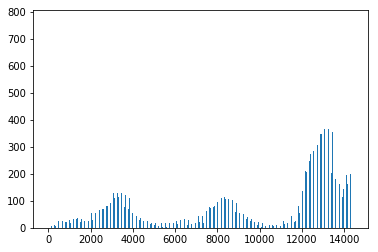

In [38]:
sums = []
counts = []
count = 0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train1.iloc[x,:]]))
    actual = np.array([Y_train1.iloc[x,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sums,width=4)

<BarContainer object of 1440 artists>

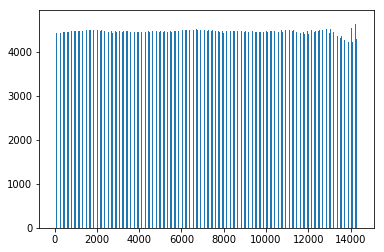

In [37]:
sums = []
counts = []
count = 0
for y in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train2.iloc[y,:]]))
    actual = np.array([Y_train2.iloc[y,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sums,width=4)

<BarContainer object of 1440 artists>

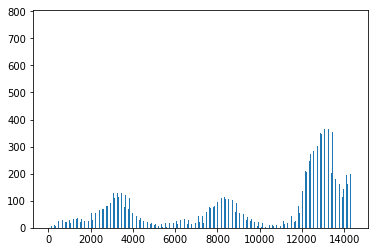

In [39]:
sums = []
counts = []
count = 0
x=0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train3.iloc[x,:]]))
    actual = np.array([Y_train3.iloc[x,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sums,width=4)

In [ ]:
sums = []
counts = []
count = 0
x=0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train4.iloc[x,:]]))
    actual = np.array([Y_train4.iloc[x,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sum)

In [ ]:
sums = []
counts = []
count = 0
x=0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train5.iloc[x,:]]))
    actual = np.array([Y_train5.iloc[x,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sums)

In [ ]:
sums = []
counts = []
count = 0
x=0
for x in range(1440):
    counts.append(count)
    guess = model.predict(np.array([X_train6.iloc[x,:]]))
    actual = np.array([Y_train6.iloc[x,:]])
    sums.append(np.linalg.norm(guess-actual))
    count+= 10
plt.bar(counts,sums)